# Classification with Tensorflow

Classification is a kind of data analysis in which we train a DNN to classify an input with a "label"

In [42]:
import os

os.environ

if (os.environ["HOME"] == "/root"):
    print("** Running inside a docker container, install dependencies")
    !pip install scipy scikit-learn numpy pandas matplotlib

if ("JPY_PARENT_PID" in os.environ):
    print("** Running inside a notebook, inlining matplotlib backend")
    %matplotlib inline

** Running inside a docker container, install dependencies
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
** Running inside a notebook, inlining matplotlib backend


In [43]:
import tensorflow as tf
from gpu import print_gpu_info

print_gpu_info()

Tensorflow version: 2.10.0
Tensorflow GPU support: True
GPU device(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [44]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [45]:
import pandas as pd
circles = pd.DataFrame({ "X0": X[:, 0], "X1": X[:, 1], "label": y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


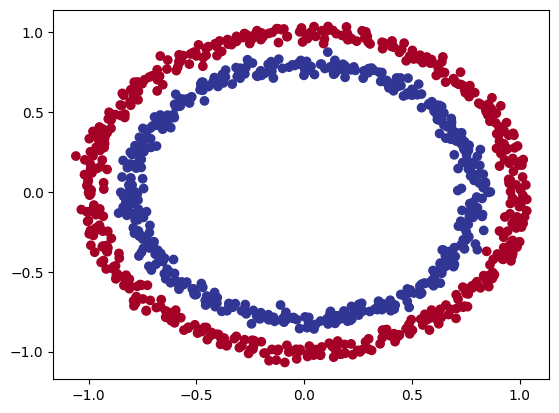

In [46]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [47]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [48]:
import tensorflow as tf

tf.random.set_seed(42)

# Create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_1.fit(X, y, epochs=5, verbose=0)

model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 4.1398 - accuracy: 0.5170


[4.1397809982299805, 0.5170000195503235]

In [49]:
# Improve the model by training longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [50]:
# Still sucks, add an extra layer

tf.random.set_seed(42)

# Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_2.fit(X, y, epochs=100, verbose=0)

In [51]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932170987129211, 0.5]

## Improve the model

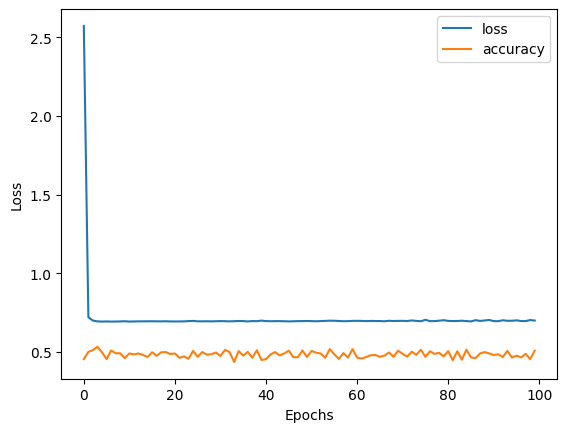

In [52]:
from sklearn.model_selection import train_test_split
from plot import plot_loss_curve

tf.random.set_seed(42)

# Create the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_3.fit(X_train, y_train, epochs=100, verbose=0)
plot_loss_curve(history)

In [53]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.4550


[0.7006937265396118, 0.45500001311302185]

## Plot model predictions

To visualize predictions create a function `plot_decision_boundary()`. This function will:

* Take in a trained model
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions

In [54]:
from plot import plot_decision_boundary

313/313 [==============================] - 0s 679us/step


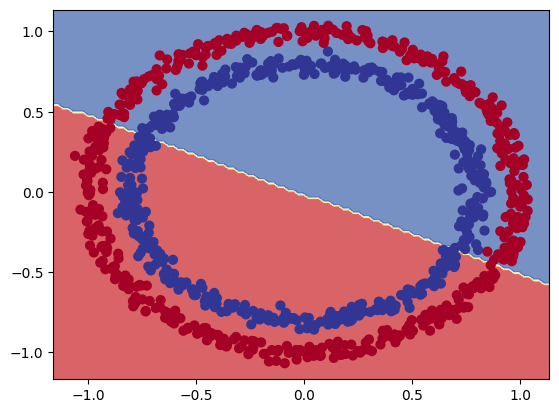

In [55]:
plot_decision_boundary(model_3, X, y)

## Why this model sucks?

It sucks because it tries to fit data in a linear fashion (see the line in the plot above?), while the data distribution is non linear.

From the plot you can see that the model is getting biased by the first red and blue circles it analyses.

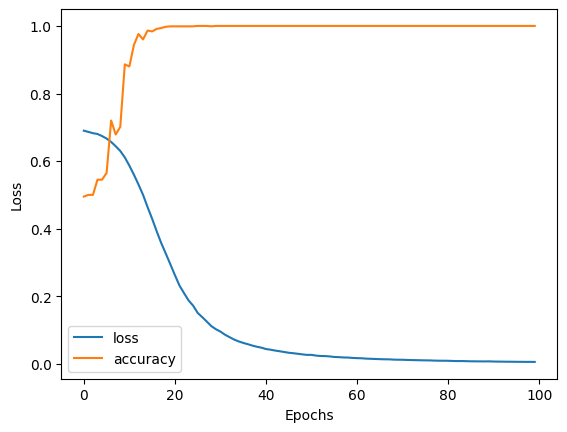

In [56]:
from sklearn.model_selection import train_test_split
from plot import plot_loss_curve

tf.random.set_seed(42)

# Create the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_4.fit(X_train, y_train, epochs=100, verbose=0)
plot_loss_curve(history)

313/313 [==============================] - 0s 730us/step


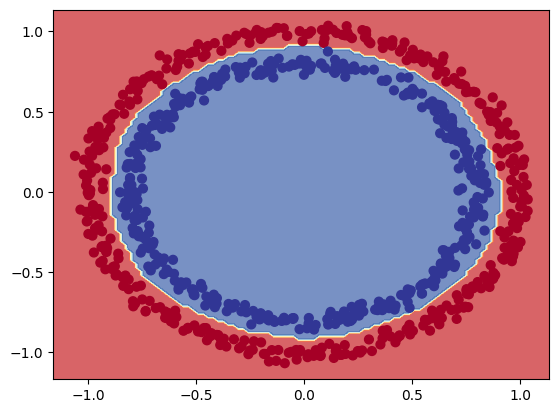

In [57]:
plot_decision_boundary(model_4, X_train, y_train)

313/313 [==============================] - 0s 732us/step


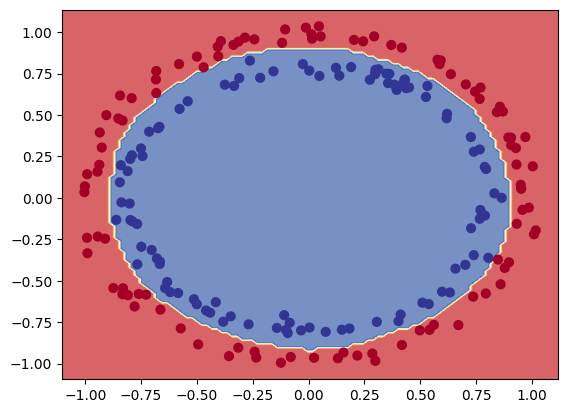

In [58]:
plot_decision_boundary(model_4, X_test, y_test)

## Adjusting the learning rate

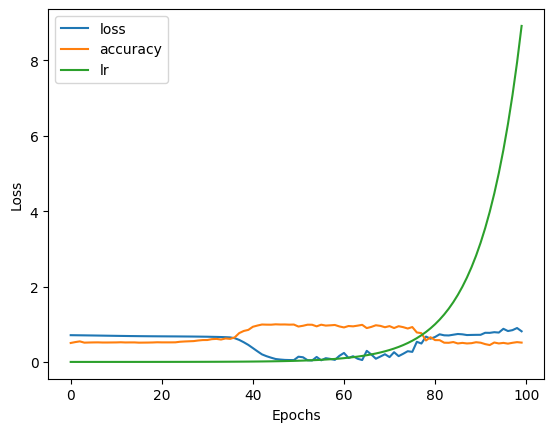

In [59]:
from sklearn.model_selection import train_test_split
from plot import plot_loss_curve

tf.random.set_seed(42)

# Create the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20)
)

history = model_5.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_callback])
plot_loss_curve(history)

Text(0, 0.5, 'Loss')

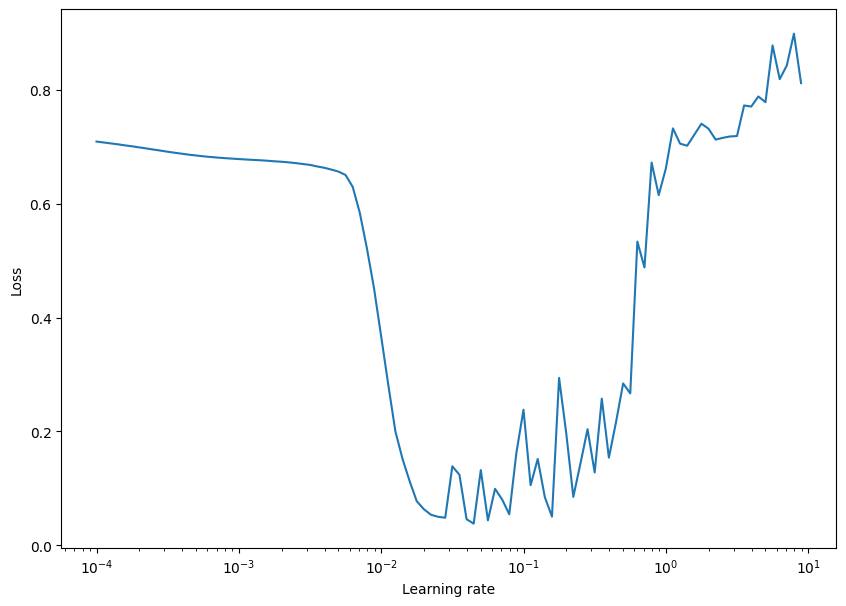

In [60]:
# plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

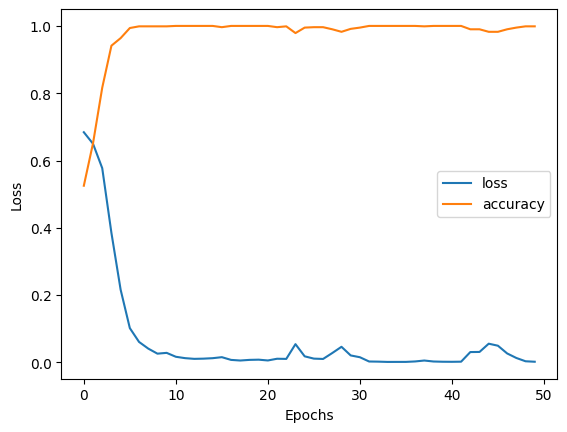

In [61]:
from sklearn.model_selection import train_test_split
from plot import plot_loss_curve

tf.random.set_seed(42)

# Create the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Use a "better" learning rate, inferred from the plot above
    metrics=["accuracy"]
)

history = model_6.fit(X_train, y_train, epochs=50, verbose=0)
plot_loss_curve(history)

In [62]:
loss, accuracy = model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000


### Create a confusion matrix

This is used to see where the model gets confused

In [63]:
from sklearn.metrics import confusion_matrix

y_pred = model_6.predict(X_test)
confusion_matrix = confusion_matrix(y_test, tf.round(y_pred))
confusion_matrix

7/7 [==============================] - 0s 1ms/step


array([[100,   0],
       [  0, 100]])

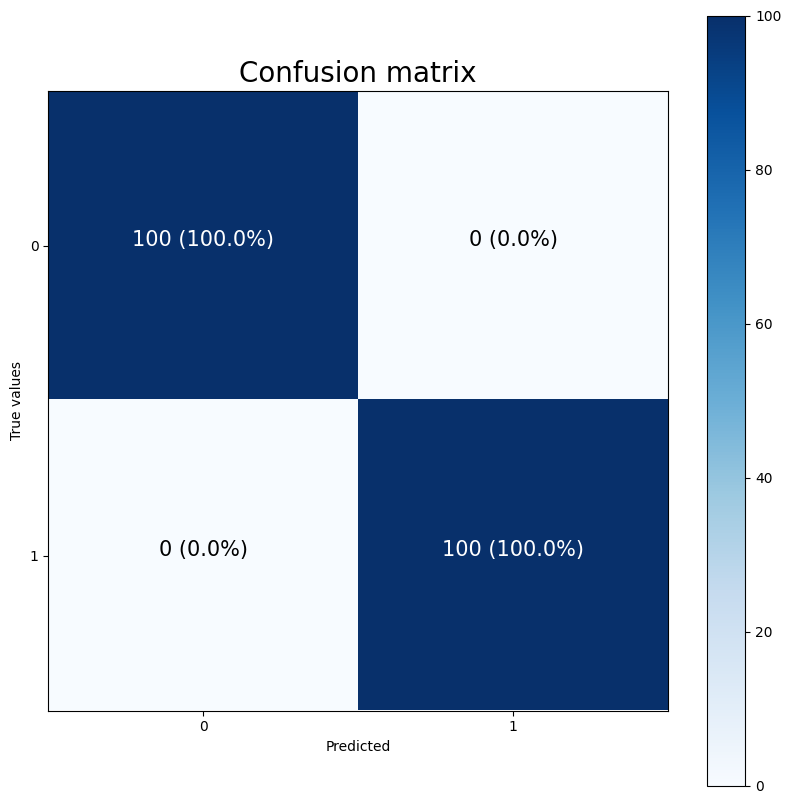

In [64]:
import numpy as np
import itertools

cm_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
n_classes = confusion_matrix.shape[0]

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

labels = np.arange(confusion_matrix.shape[0])
ax.set(title="Confusion matrix", xlabel="Predicted", ylabel="True values", xticks=np.arange(n_classes), yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
ax.title.set_size(20)

threshold = (confusion_matrix.max() + confusion_matrix.min()) / 2

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, f"{confusion_matrix[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if confusion_matrix[i, j] > threshold else "black",
                size=15
            )

## Putting it togheter: a larger example with multiclass classification

When you have more than two classes as an option, it's known as **multiclass classification**.
This means if you have > 2 different classes is multiclass classification

To practice multiclass classification we're going to build a DNN to classify images of different items of cloting

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already splitted into train/test sets

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Trainig label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

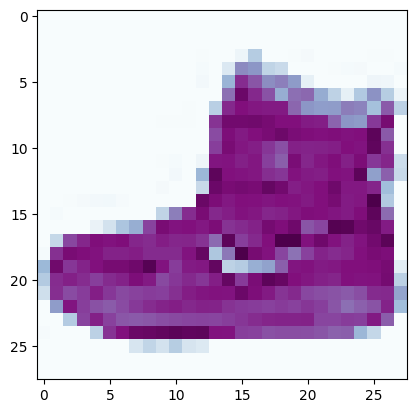

In [68]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap="BuPu")

In [69]:
# Create a small list of textual labels for outcomes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'T-shirt/top')

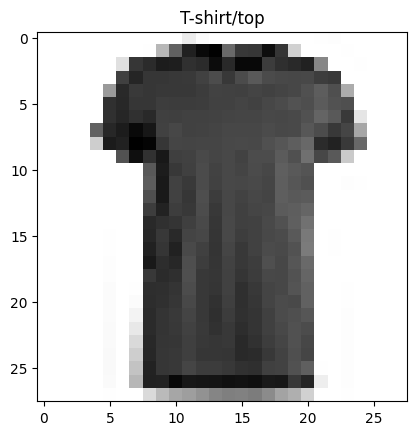

In [70]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

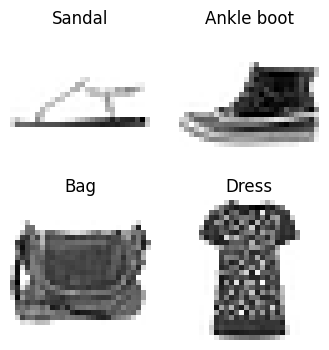

In [71]:
# Plot multiple images
import random
plt.figure(figsize=(4,4))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Building a DNN

In [72]:
tf.random.set_seed(42)

# Create the model
mc_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_data[0].shape)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

mc_model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history = mc_model_1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9575 - accuracy: 0.7217 - val_loss: 0.6816 - val_accuracy: 0.7642
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6472 - accuracy: 0.7856 - val_loss: 0.7053 - val_accuracy: 0.7813
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5879 - accuracy: 0.8058 - val_loss: 0.6080 - val_accuracy: 0.7842
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5845 - accuracy: 0.8077 - val_loss: 0.5837 - val_accuracy: 0.8136
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5352 - accuracy: 0.8230 - val_loss: 0.5415 - val_accuracy: 0.8167
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4900 - accuracy: 0.8339 - val_loss: 0.5497 - val_accuracy: 0.8161
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4680 - accuracy: 0.8403 - val_loss: 0.4712 - val_accuracy:

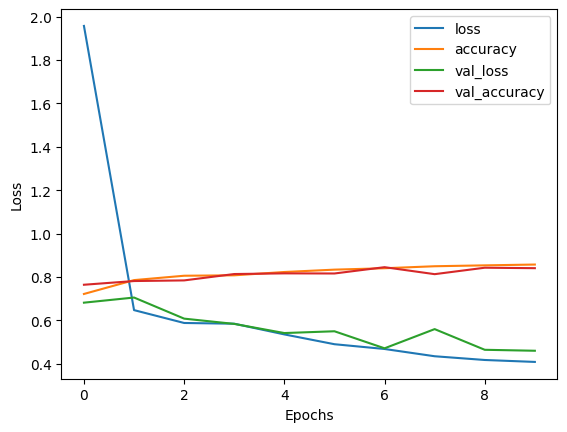

In [73]:
from plot import plot_loss_curve
plot_loss_curve(non_norm_history)

Neural networks like to have data that is scaled (normalized)

In [74]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check normalized values

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [78]:
tf.random.set_seed(42)
# Create the model
mc_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

mc_model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

norm_history = mc_model_2.fit(
    train_data_norm,
    train_labels,
    epochs=5,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4942 - accuracy: 0.8243 - val_loss: 0.4152 - val_accuracy: 0.8492
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3655 - accuracy: 0.8660 - val_loss: 0.4676 - val_accuracy: 0.8397
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3332 - accuracy: 0.8774 - val_loss: 0.3934 - val_accuracy: 0.8548
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3101 - accuracy: 0.8866 - val_loss: 0.3685 - val_accuracy: 0.8667
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2941 - accuracy: 0.8898 - val_loss: 0.3501 - val_accuracy: 0.8725


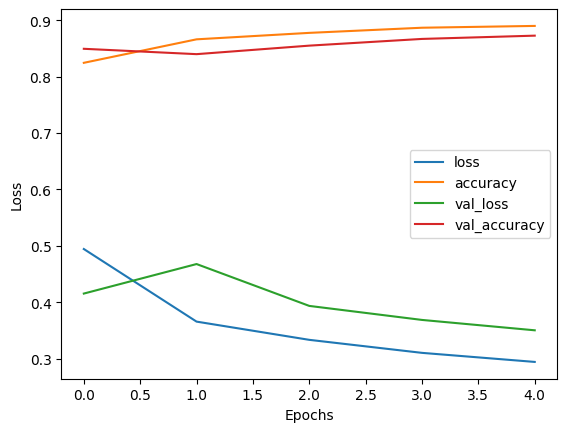

In [79]:
plot_loss_curve(norm_history)

Try to predict from an image taken from the internet?

1/1 [==============================] - 0s 37ms/step


'Ankle boot'

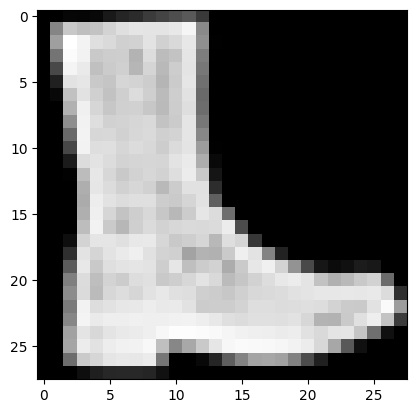

In [80]:
import matplotlib.pyplot as plt
from image import image_from_url
import numpy as np
import tensorflow as tf

test_image = image_from_url(
    "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.shoekandi.co.uk%2Fimages%2Fshoekandi-buckled-biker-ankle-boot-studded-black-p96-1095_zoom.jpg&f=1&nofb=1",
    color_conversion="L",
    resize=(28,28)
)
plt.imshow(test_image, cmap=plt.cm.binary)

image_tensor = tf.cast(tf.constant(np.array(test_image.getdata())), dtype=tf.float32) / 255.0
predictions = mc_model_2.predict(tf.reshape(image_tensor, (1, 28, 28)))
class_names[np.argmax(predictions)]